<a href="https://colab.research.google.com/github/wand-work/steam_year_stats/blob/main/Steam_Games_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steam Games Dataset Analysis**

Steam Games Dataset เป็นข้อมูลที่เกี่ยวกับเกมในแพลตฟอร์มที่มีชื่อว่า “Steam” ซึ่งเป็นแพลตฟอร์มสำหรับรวบรวมและจัดจำหน่ายเกมดิจิทัลที่เป็นที่นิยมเป็นอย่างมาก โดยหวังว่าการวิเคราะห์จะทำให้เกิดความเข้าใจต่อแนวโน้มและปัจจัยต่าง ๆ ที่มีผลต่อยอดขายและความนิยมของเกมได้มากยิ่งขึ้น



---



# **1. Data & Package**

ก่อนเริ่มการวิเคราะห์ได้ทำการติดตั้ง library เพื่อใช้ในการจัดการ วิเคราะห์ และนำเสนอข้อมูล โดยได้ทำการนำเข้าข้อมูลมาจาก kaggle ซึ่ง library ที่เลือกใช้เป็นหลักนั้น ได้แก่ Pandas, NumPy, Opendatasets, Matplotlib และ Seaborn เนื่องจากข้อมูลที่ได้มานั้นเป็น Structure Data

In [1]:
# Import library
!pip install opendatasets
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset from Kaggle
od.download(
    "https://www.kaggle.com/datasets/fronkongames/steam-games-dataset")
df_steam = pd.read_csv('/content/steam-games-dataset/games.csv')
print( f"\n\nRows\n\n{df_steam.index=}" )
print( f"\n\nColums\n\n{df_steam.columns=}" )

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: phimwib
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset


100%|██████████| 211M/211M [00:01<00:00, 149MB/s]





Rows

df_steam.index=Index([  20200,  655370, 1732930, 1355720, 1139950, 1469160, 1659180, 1968760,
       1178150,  320150,
       ...
       3148680, 2435240, 2214970, 3165130, 3199580, 3080940, 2593970, 3137150,
       3124670, 3054200],
      dtype='int64', length=97410)


Colums

df_steam.columns=Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DiscountDLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')


เมื่อทำการนำเข้าข้อมูล จะเห็นได้ว่าข้อมูลชุดนี้มีทั้งหมด 97,410 แถว และมีทั้งหมด 39 คอลัมน์ โดยรายละเอียดแต่ละคอลัมน์มีดังต่อไปนี้
1. AppID = รหัสประจำตัวของเกมใน Steam
2. Name = ชื่อของเกม
3. Release date = วันที่เกมถูกเปิดตัว
4. Estimated owners = ค่าประมาณจำนวนผู้ที่เป็นเจ้าของเกม
5. Peak CCU = จำนวนผู้เล่นพร้อมกันสูงสุด
6. Required age = อายุขั้นต่ำที่อนุญาตให้เล่นเกม
7. Price = ราคาของเกม
8. DiscountDLC count = จำนวน DLC ที่ลดราคา
9. About the game = คำอธิบายสั้น ๆ เกี่ยวกับเกม
10. Supported languages = ภาษาที่เกมรองรับ
11. Full audio languages = ภาษาที่รองรับเสียงพากย์เต็มรูปแบบ
12. Reviews = ความคิดเห็นจากผู้เล่นหรือเว็บไซต์
14. Website = เว็บไซต์ของเกม
15. Support url = ลิงก์สำหรับการสนับสนุนเกม
16. Support email = อีเมลสำหรับการติดต่อสนับสนุน
17. Windows = เกมรองรับบน Windows
18. Mac = เกมรองรับบน Mac
19. Linux = เกมรองรับบน Linux
20. Metacritic score = คะแนนจากเว็บไซต์ Metacritic
21. Metacritic url = ลิงก์ไปยังหน้า Metacritic ของเกม
22. User score = คะแนนที่ผู้ใช้งานให้เกม
23. Positive = คะแนนโหวตเชิงบวก
24. Negative = คะแนนโหวตเชิงลบ
25. Score rank = อันดับของเกมตามคะแนน
26. Achievements = จำนวนความสำเร็จที่ผู้เล่นสามารถปลดล็อกได้ในเกม
27. Recommendations = จำนวนคำแนะนำเกมจากผู้เล่น
28. Notes = ข้อมูลเพิ่มเติม
29. Average playtime forever = เวลาเล่นเฉลี่ยตั้งแต่เกมออก
30. Average playtime two weeks = เวลาเล่นเฉลี่ยในช่วง 2 สัปดาห์ที่ผ่านมา
31. Median playtime forever = เวลาเล่นกลางใตั้งแต่เกมออก
32. Median playtime two weeks = เวลาเล่นกลางในช่วง 2 สัปดาห์ที่ผ่านมา
33. Developers = ชื่อผู้พัฒนาเกม
34. Publishers = ชื่อผู้จัดจำหน่ายเกม
35. Categories = ประเภทหรือหมวดหมู่ของเกม (เช่น Single-player, Multi-player)
36. Genres = แนวของเกม (เช่น Action, Adventure)
37. Tags = แท็กหรือคำสำคัญที่เกี่ยวกับเกม
38. Screenshots = ภาพหน้าจอของเกม
39. Movies = วิดีโอหรือคลิปเกี่ยวกับเกม



---



# **2. Cleansing Data**

จากข้อมูลที่ได้มานั้น พบว่าข้อมูลอยู่ในรูปแบบที่ไม่สมบูรณ์ จึงได้มีการปรับปรุงและแก้ไขข้อมูลเพื่อให้ง่ายต่อการวิเคราะห์มากยิ่งขึ้น โดยได้แก้ไขส่วนต่าง ๆ  ดังต่อไปนี้

## **2.1 Renaming Columns**




จากการตรวจสอบพบว่า คอลัมน์ 'Name' ไม่ใช่ค่าจริงในคอลัมน์นี้ จึงได้ทำการลบคอลัมน์ทิ้ง อีกทั้งชื่อคอลัมน์ใน 7 คอลัมน์แรกมีการเลื่อน ทำให้ข้อมูลในแต่ละคอลัมน์ไม่ตรงกับชื่อที่ควรจะเป็น ดังนั้นจึงมีการแก้ไขชื่อคอลัมน์เพื่อให้ข้อมูลสอดคล้องกับชื่อคอลัมน์ที่ถูกต้อง นอกจากนี้ยังมีการปรับชื่อคอลัมน์บางส่วนเล็กน้อย เพื่อให้ง่ายต่อการนำไปวิเคราะห์ และได้กำหนดให้คอลัมน์ 'Name' เป็นดัชนีหลักของตารางนี้อีกด้วย

In [4]:
# Renaming Columns
df = df_steam.drop('Price', axis=1)
df_re = df.rename(columns = {'AppID':'Name', 'Name':'Release_date', 'Release date':'owners', 'Estimated owners':'Peak_CCU', 'Peak CCU':'required_age', 'Required age':'Price',
                             'Metacritic score':'Metacritic_score', 'Average playtime forever':'Avg_playtime', 'Median playtime forever':'Median_playtime'})

df_re.set_index('Name', inplace=True)

In [5]:
# Before Rename
df_steam.head(3)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [6]:
# After Rename
df_re.head(3)

,Release_date,owners,Peak_CCU,required_age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,...,Average playtime two weeks,Median_playtime,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
Name,,,,,,,,,,,,,,,,,,,,,
Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## **2.2 Dropping Unused Columns**

เมื่อพิจารณาถึงความต้องการในการวิเคราะห์ พบว่าบางคอลัมน์นั้นไม่มีความจำเป็นที่จะต้องใช้ในการวิเคราะห์ครั้งนี้ จึงได้ทำการลบคอลัมน์เหล่านั้นออกไป

In [7]:
# Dropping Unused Columns
df = df_re.drop(['required_age','DiscountDLC count', 'About the game','Supported languages', 'Full audio languages',
                 'Header image', 'Website', 'Support url', 'Support email','User score', 'Metacritic url', 'Score rank',
                 'Achievements','Notes', 'Average playtime two weeks', 'Median playtime two weeks','Tags', 'Screenshots', 'Movies'], axis = 1)

## **2.3 Missing Value**

เมื่อลองตรวจสอบข้อมูลที่หายไป พบว่าคอลัมน์ที่มีข้อมูลที่หายไปมีทั้งหมด 5 คอลัมน์ด้วยกัน ได้แก่ คอลัมน์ 'Reviews',  'Developers', 'Publishers', 'Categories' และ 'Genres'

In [8]:
# Check Missing Values
df.isna().sum()

,0
Release_date,0
owners,0
Peak_CCU,0
Price,0
Reviews,87285
Windows,0
Mac,0
Linux,0
Metacritic_score,0
Positive,0


In [9]:
# Percent Of Missing Values
print(f"Percent of missing Reviews = {df['Reviews'].isnull().sum()/df.shape[0]*100:.2f}%")
print(f"Percent of missing Developers = {df['Developers'].isnull().sum()/df.shape[0]*100:.2f}%")
print(f"Percent of missing Publishers = {df['Publishers'].isnull().sum()/df.shape[0]*100:.2f}%")
print(f"Percent of missing Categories = {df['Categories'].isnull().sum()/df.shape[0]*100:.2f}%")
print(f"Percent of missing Genres = {df['Genres'].isnull().sum()/df.shape[0]*100:.2f}%")

Percent of missing Reviews = 89.61%
Percent of missing Developers = 5.01%
Percent of missing Publishers = 5.31%
Percent of missing Categories = 6.07%
Percent of missing Genres = 4.97%


เมื่อทำการตรวจสอบอัตราส่วนของข้อมูลที่หายไป พบว่าคอลัมน์ 'Reviews' มีอัตราส่วนถึง 89.61 ซึ่งถือว่าสูงมาก จึงได้ตัดสินใจลบคอลัมน์ 'Reviews' ออก
ในขณะที่คอลัมน์ 'Developers', 'Publishers', 'Categories' และ 'Genres'
มีอัตราส่วนของข้อมูลที่หายไปไม่ถึง 1 ใน 10 ของข้อมูลทั้งหมด จึงเลือกที่จะเก็บคอลัมน์เหล่านี้ไว้และแทนค่าข้อมูลที่หายไปด้วยคำว่า unknown

In [10]:
d1 = df.drop('Reviews', axis = 1)

In [11]:
d1['Developers'].fillna('unknown', inplace=True)
d1['Publishers'].fillna('unknown', inplace=True)
d1['Categories'].fillna('unknown', inplace=True)
d1['Genres'].fillna('unknown', inplace=True)

## **2.4 Converting formats**

เนื่องจากข้อมูลในคอลัมน์ 'Avg_playtime' และ 'Median_playtime' ถูกบันทึกในหน่วยนาที ซึ่งอาจทำให้การอ่านค่อนข้างยาก จึงได้ทำการแปลงหน่วยจากนาทีเป็นชั่วโมงเพื่อลดจำนวนตัวเลขให้อ่านง่ายขึ้น นอกจากนี้ คอลัมน์ 'Release_date' ที่มีรูปแบบเป็น object ได้ถูกปรับให้อยู่ในรูปแบบวันที่ และได้สร้างคอลัมน์ 'Year' เพิ่มขึ้นมาเพื่ออำนวยความสะดวกในการวิเคราะห์ข้อมูลเพิ่มเติม

In [12]:
# Convert Minutes To Hours
def minutes_to_hours(minutes:int):
    hours = (minutes) // 60      # Integer division to get hours
    return hours

d1['Avg_playtime'] = d1['Avg_playtime'].apply(minutes_to_hours)
d1['Median_playtime'] = d1['Median_playtime'].apply(minutes_to_hours)

In [13]:
# Converting Type
d1['Release_date'] = pd.to_datetime(d1['Release_date'], errors='coerce')
d1['Year'] = d1['Release_date'].dt.year
d1['Year'] = d1['Year'].astype('Int64')

สุดท้ายแล้วข้อมูลจะมีคอลัมน์ทั้งหมด 18 คอลัมน์ และข้อมูลที่ได้ทำการเปลี่ยนรูปแบบเป็นดังต่อไปนี้

In [17]:
# Show data info
d1.info()
d1.loc[:, ['Avg_playtime','Median_playtime', 'Year']].sort_values(by=['Avg_playtime'], ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 97410 entries, Galactic Bowling to Lober Lobe
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Release_date      97279 non-null  datetime64[ns]
 1   owners            97410 non-null  float64       
 2   Peak_CCU          97410 non-null  int64         
 3   Price             97410 non-null  float64       
 4   Windows           97410 non-null  bool          
 5   Mac               97410 non-null  bool          
 6   Linux             97410 non-null  bool          
 7   Metacritic_score  97410 non-null  int64         
 8   Positive          97410 non-null  int64         
 9   Negative          97410 non-null  int64         
 10  Recommendations   97410 non-null  int64         
 11  Avg_playtime      97410 non-null  int64         
 12  Median_playtime   97410 non-null  int64         
 13  Developers        97410 non-null  object        
 14  Publish

,Avg_playtime,Median_playtime,Year
Name,,,
Boom 3D,2428,2428,2019
Energy Engine PC Live Wallpaper,1737,3474,2019
副作用之瞳-Tlicolity Eyes-,1505,1505,2021
Defense Clicker,1267,1267,2017
Relive,1139,2277,2015
...,...,...,...
Flight Of Nova,0,0,2022
Immersion Chess,0,0,2017
Abda Redeemer: Space alien invasion,0,0,2021




---



# **3. Data Exploratory**

หลังจากการ cleansing ข้อมูล ต้องการที่จะรู้ว่าข้อมูลมีอะไรที่น่าสนใจ หน้าตาลักษณะของข้อมูลเป็นอย่างไร

## **3.1 Categories**

อย่างแรกได้ลองทำการแบ่ง category ของเกมดูก่อนว่าเกมนั้นมีกี่ category และมีอะไรบ้าง

เมื่อทราบจึงอยากรู้ว่าเกมใน category ไหนเป็นที่นิยมมากที่ ผลที่ได้คือ...เป็นที่นิยมมากที่สุด ตามกราฟที่ได้แสดงดังต่อไปนี้

## **3.2 Genres**

จากนั้นได้ลองทำการแบ่ง genres ของเกมดูก่อนว่าเกมนั้นมีกี่ genres และมีอะไรบ้าง

เมื่อทราบจึงอยากรู้ว่าเกมใน genres ไหนเป็นที่นิยมมากที่ ผลที่ได้คือ...เป็นที่นิยมมากที่สุด ตามกราฟที่ได้แสดงดังต่อไปนี้

## **3.3 Playtime**

อยากทราบว่าช่วงเวลาเฉลี่ยที่เล่นเกมในแต่ละปีเป็นเท่าใด แ

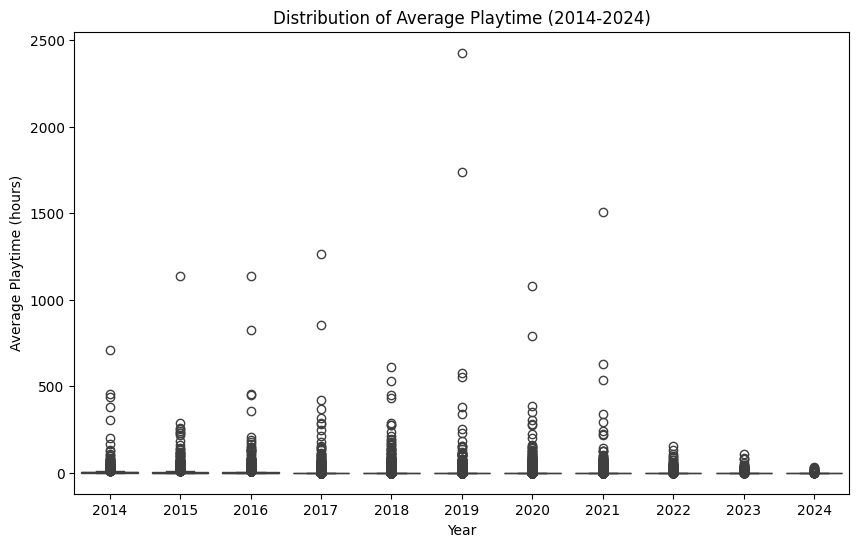

In [15]:
#
filtered_df = d1[(d1['Year'] >= 2014) & (d1['Year'] <= 2024)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Avg_playtime', data=filtered_df)
plt.xlabel('Year')
plt.ylabel('Average Playtime (hours)')
plt.title('Distribution of Average Playtime (2014-2024)')
plt.show()

## **3.4 Price**

# **4. Insight Analysis**

## **4.1 Correlation**

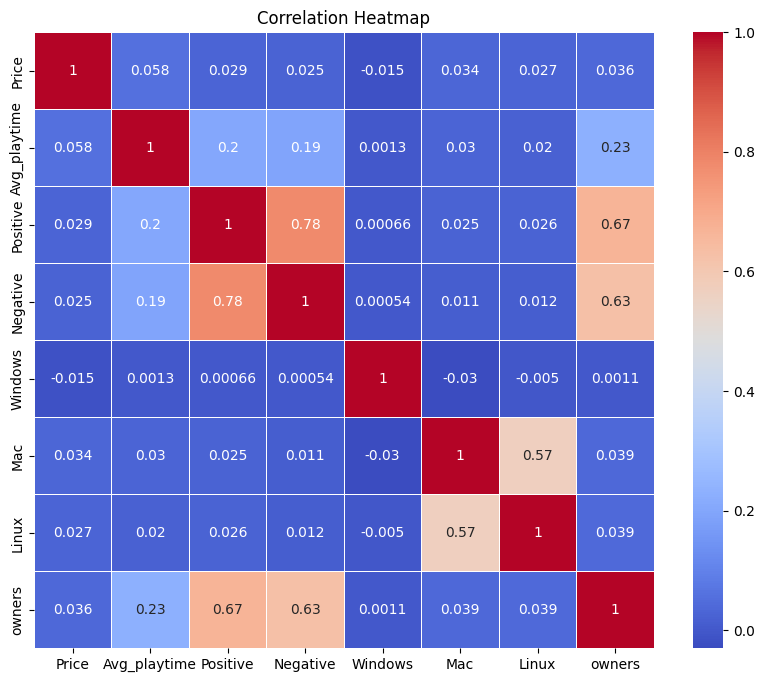

In [18]:
# เลือกคอลัมน์ที่ต้องการดูความสัมพันธ์
cols = ['Price', 'Avg_playtime', 'Positive', 'Negative', 'Windows', 'Mac', 'Linux', 'owners']

# Convert 'Price' and 'owners' columns to numeric if they contain ranges
# Assuming the ranges are in the format 'min - max'
def convert_range_to_midpoint(value):
    try:
        # Attempt to convert directly to float if already numeric
        return float(value)
    except ValueError:
        # If ValueError, assume it's a range and calculate midpoint
        if isinstance(value, str) and '-' in value:
            min_val, max_val = map(float, value.split('-'))
            return (min_val + max_val) / 2
        else:
            # If not a recognizable range, return NaN
            return float('nan')

# Apply the conversion to 'Price' and 'owners' columns
d1['Price'] = d1['Price'].apply(convert_range_to_midpoint)
d1['owners'] = d1['owners'].apply(convert_range_to_midpoint)


# สร้าง correlation matrix
corr_matrix = d1[cols].corr()

# วาด heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

แต่เมื่อได้ดูจากกราฟ correlation กลับพบว่า ความสัมพันธ์ของการเป็นเจ้าของกับpositive nagative นั้นสูงมาก จึงได้เจาะลงไปว่าอะไรเป็นสาเหตุ

## **4.2 Systems**

## **4.3 Positive and Negative**

# **5. Summary**

สุดท้ายนี้จากการวิเคราะห์ข้อมูลทั้งหมดสามารถสรุปได้ว่า